<a href="https://colab.research.google.com/github/prfferreira/Series-Temporais-Python/blob/main/Serie_Temporal_de_bitconin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intalação das bibliotecas yfinance e pmdarima

In [1]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importando as principais bibliotecas necessárias para realização da analise 

In [40]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt, matplotlib.figure as figure
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pmdarima import auto_arima
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

# Coleta do Yahoo Financial da ação BTC-USD (Biticoin) entre 01/12/2021 até 31/01/2022

In [9]:
dados_series = yf.download("BTC-USD", start="2021-12-01", end="2022-01-31")

[*********************100%***********************]  1 of 1 completed


In [10]:
print(dados_series.head())
print(dados_series.tail())

                    Open          High           Low         Close  \
Date                                                                 
2021-12-01  56907.964844  59041.683594  56553.082031  57229.828125   
2021-12-02  57217.371094  57349.234375  55895.132812  56477.816406   
2021-12-03  56509.164062  57482.167969  52496.585938  53598.246094   
2021-12-04  53727.878906  53904.679688  42874.617188  49200.703125   
2021-12-05  49201.519531  49768.148438  47857.496094  49368.847656   

               Adj Close       Volume  
Date                                   
2021-12-01  57229.828125  36858195307  
2021-12-02  56477.816406  32379968686  
2021-12-03  53598.246094  39789134215  
2021-12-04  49200.703125  61385677469  
2021-12-05  49368.847656  37198201161  
                    Open          High           Low         Close  \
Date                                                                 
2022-01-26  36950.515625  38825.410156  36374.906250  36852.121094   
2022-01-27  36841.8

# Histograma dos fechamentos 

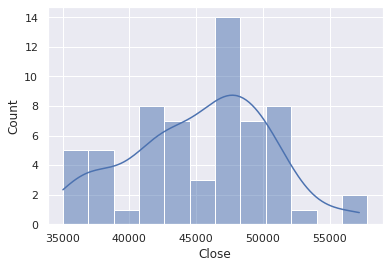

In [31]:
sns.set_theme(style="darkgrid")
sns.histplot(dados_series['Close'].dropna(),kde=True,stat="count",binwidth=1900)

# Acompanhamento do valor do fechamento no período de 60 dias

In [83]:
dados_grafico = [go.Scatter(x=dados_series.index, y=dados_series['Close'])]

py.iplot(dados_grafico, auto_play=True)

# Realizando a decomposição aditiva 

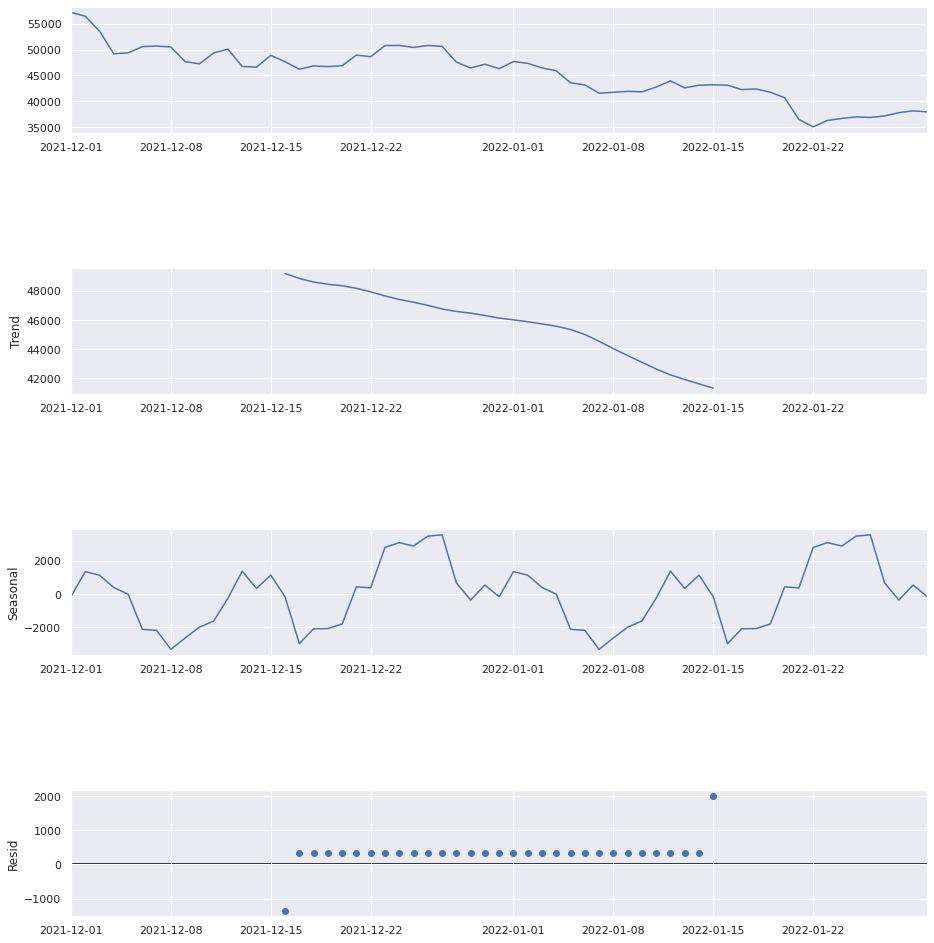

In [57]:
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1) 
decompo_aditiva = sm.tsa.seasonal_decompose(x=df, period=30, model='additive')
fig = decompo_aditiva.plot()
fig.set_size_inches(15,15)
plt.show()

# Realizando a decomposição multiplicativa

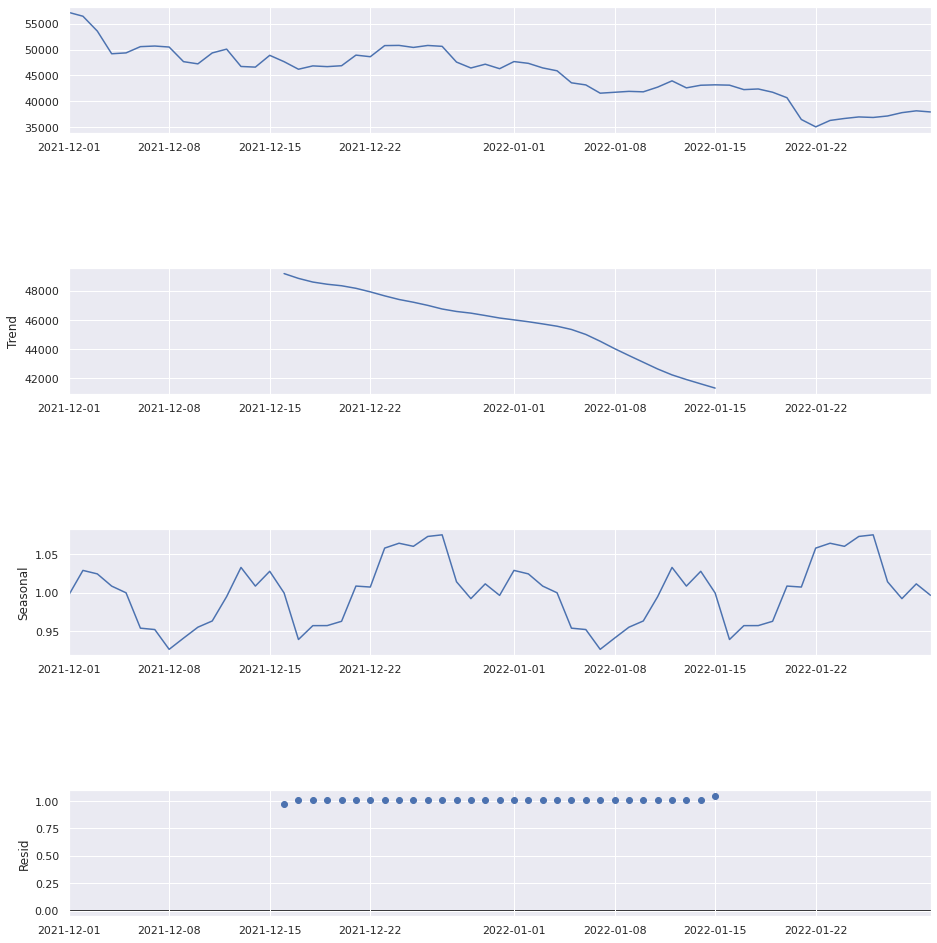

In [62]:
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1) 
decompo_multi = sm.tsa.seasonal_decompose(x=df, period=30, model='multiplicative')
fig = decompo_multi.plot()
fig.set_size_inches(15,15)
plt.show()

# **Modelos de Médias Móveis (Suavização)**

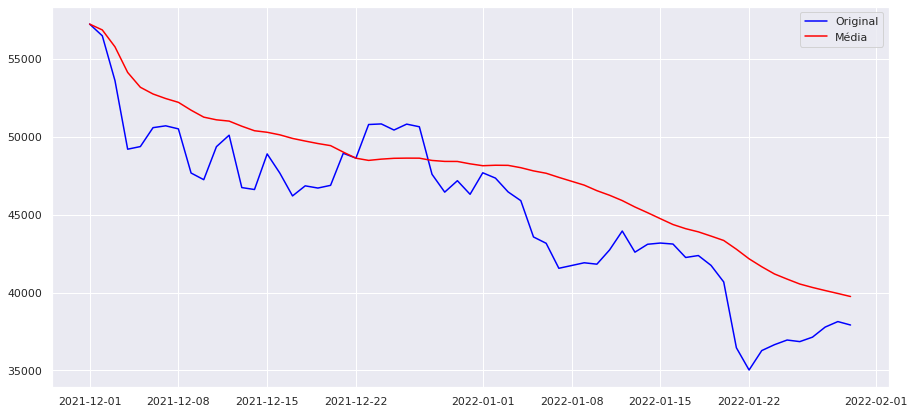

In [97]:
mm = pd.DataFrame.rolling(df,window=20,center=False,min_periods=1).mean()
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(mm, color='red',label='Média')
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (15,7)
plt.show()

# Identificando qual o melhor tipo de serie temporal

In [138]:
setpwise_fit = auto_arima(df['Close'],trace=False,suppress_warnings=True)
print(setpwise_fit)

 ARIMA(2,1,2)(0,0,0)[0] intercept


# Treinando o modelo ARIMA no p,d,q

In [136]:
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(df['Close'], order=(2,1,2))
modelo_fit = modelo.fit()
print(modelo_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   61
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -514.327
Date:                Sat, 12 Nov 2022   AIC                           1038.653
Time:                        23:16:03   BIC                           1049.125
Sample:                    12-01-2021   HQIC                          1042.749
                         - 01-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5599      0.116      4.807      0.000       0.332       0.788
ar.L2         -0.7814      0.108     -7.252      0.000      -0.993      -0.570
ma.L1         -0.5430      0.131     -4.156      0.0

# Realizando a predição do modelo

In [141]:
fim = len(df)-1
predicoes = modelo_fit.predict(start=0, end=fim).rename("Predições ARIMA")

# Demonstrando os valores coletados e predição

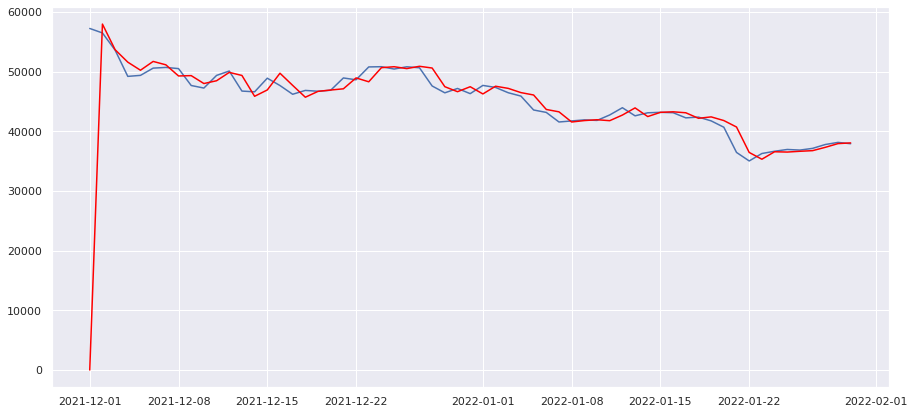

In [142]:
plt.plot(df)
plt.plot(predicoes,color='red')